In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import yaml
import numpy as np
import os
from PIL import Image
import glob
%matplotlib inline

In [2]:
# MAP_NAME = "Hockenheim_map"
# MAP_NAME = "competition_RAW"
MAP_NAME = "practice"

In [3]:
csv_files = glob.glob(f'outputs/{MAP_NAME}/*.csv', recursive=True)
csv_files = sorted(csv_files)
csv_files

['outputs/practice/traj_race_cl-2024-11-24 15:37:52.512398.csv',
 'outputs/practice/traj_race_cl-2024-11-24 15:42:59.772159.csv']

In [13]:
raw_data = pd.read_csv(csv_files[-1], header=None, sep=',')
raw_data

,0,1,2
0,-1.472211,-0.897919,3.685606
1,-1.461453,-1.389605,3.551597
2,-1.513103,-1.881595,3.602191
3,-1.622093,-2.366168,3.661333
4,-1.780232,-2.837093,3.726666
5,-1.977192,-3.292557,3.720298
6,-2.205077,-3.732369,3.466363
7,-2.451891,-4.161684,3.078079
8,-2.671068,-4.605150,2.746345
9,-2.814165,-5.078821,2.472478


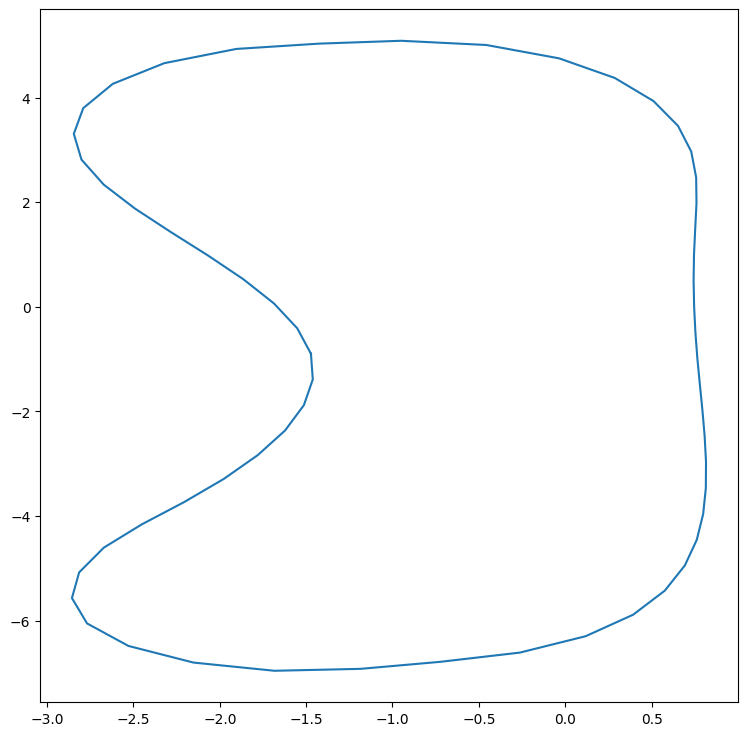

In [14]:
plt.figure(figsize=(9,9))
plt.plot(raw_data.iloc[:, 0], raw_data.iloc[:, 1])

In [15]:
# Overlay the racetrack on the map
# load map yaml
if os.path.exists(f"maps/{MAP_NAME}.png"):
    map_img_path = f"maps/{MAP_NAME}.png"
elif os.path.exists(f"maps/{MAP_NAME}.pgm"):
    map_img_path = f"maps/{MAP_NAME}.pgm"
else:
    raise Exception("Map not found!")

map_yaml_path = f"maps/{MAP_NAME}.yaml"
with open(map_yaml_path, 'r') as yaml_stream:
    try:
        map_metadata = yaml.safe_load(yaml_stream)
        map_resolution = map_metadata['resolution']
        origin = map_metadata['origin']
    except yaml.YAMLError as ex:
        print(ex)

# calculate map parameters
orig_x = origin[0]
orig_y = origin[1]
# ??? Should be 0
orig_s = np.sin(origin[2])
orig_c = np.cos(origin[2])

# get the distance transform
transformed_data = raw_data.copy()
transformed_data -= np.array([orig_x, orig_y, 0])
transformed_data.iloc[:, :2] /= map_resolution

raw_map_img = np.array(Image.open(map_img_path).transpose(Image.FLIP_TOP_BOTTOM))
raw_map_img = raw_map_img.astype(np.float64)


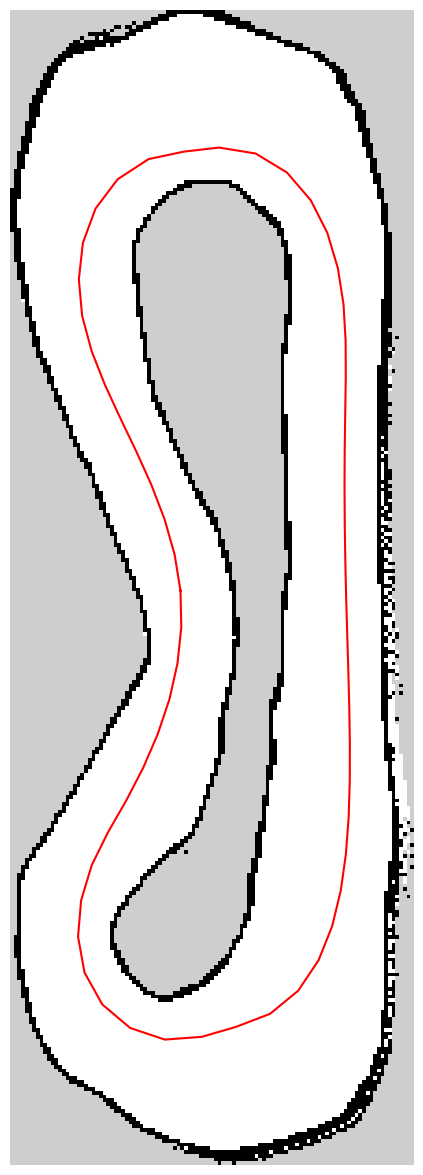

In [16]:
plt.figure(figsize=(15,15))
plt.imshow(raw_map_img, cmap='gray', origin='lower')
plt.plot(transformed_data.iloc[:, 0], transformed_data.iloc[:, 1], color='red')
# Save image without the axis
plt.axis('off')
plt.savefig(f"outputs/{MAP_NAME}_raceline.png", bbox_inches='tight', pad_inches=0)

(-0.5, 108.5, -0.5, 311.5)

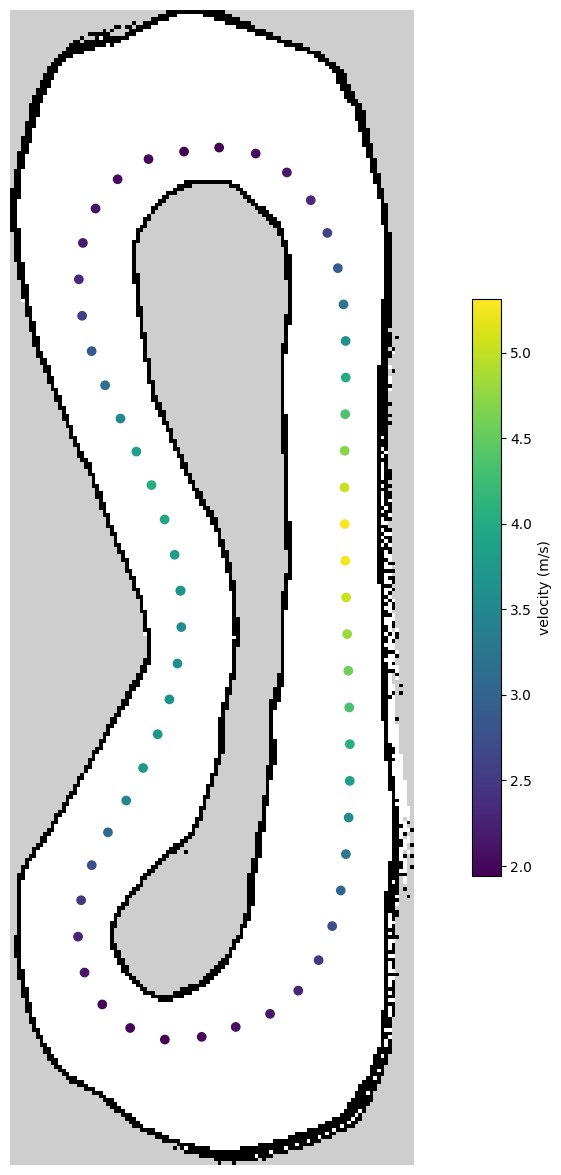

In [17]:
%matplotlib inline
plt.figure(figsize=(15,15))
plt.scatter(transformed_data.iloc[:, 0], transformed_data.iloc[:, 1], c=transformed_data.iloc[:, 2])
cbar = plt.colorbar(shrink=0.5)
cbar.set_label('velocity (m/s)')

plt.imshow(raw_map_img, cmap='gray', origin='lower')
plt.axis('off')

## (OPTIONAL) Overlay on the original map

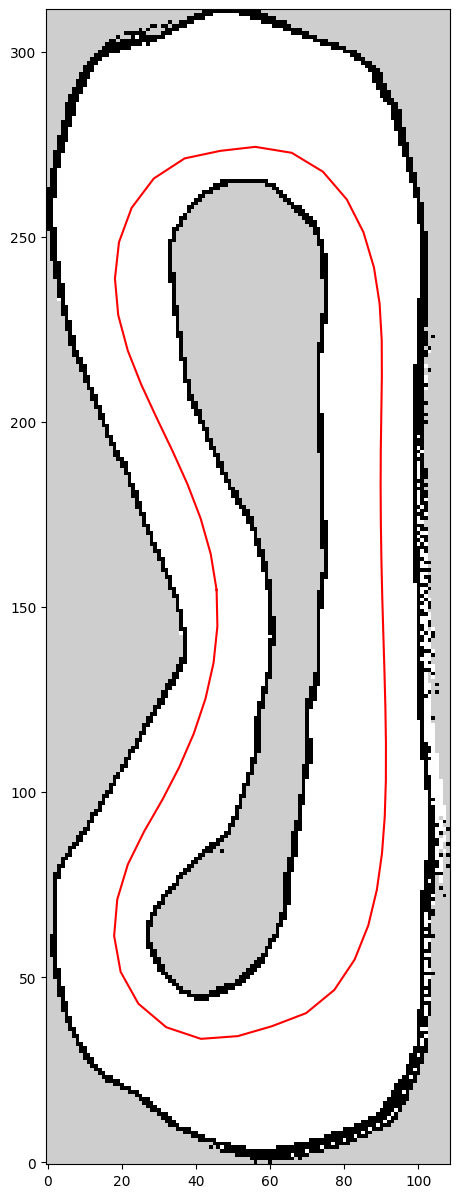

In [18]:
ORIG_MAP = f"{MAP_NAME}"
orig_map_img = np.array(Image.open(f"maps/{ORIG_MAP}.pgm").transpose(Image.FLIP_TOP_BOTTOM))
orig_map_img = orig_map_img.astype(np.float64)
plt.figure(figsize=(15,15))
plt.imshow(orig_map_img, cmap='gray', origin='lower')
plt.plot(transformed_data.iloc[:, 0], transformed_data.iloc[:, 1], color='red')

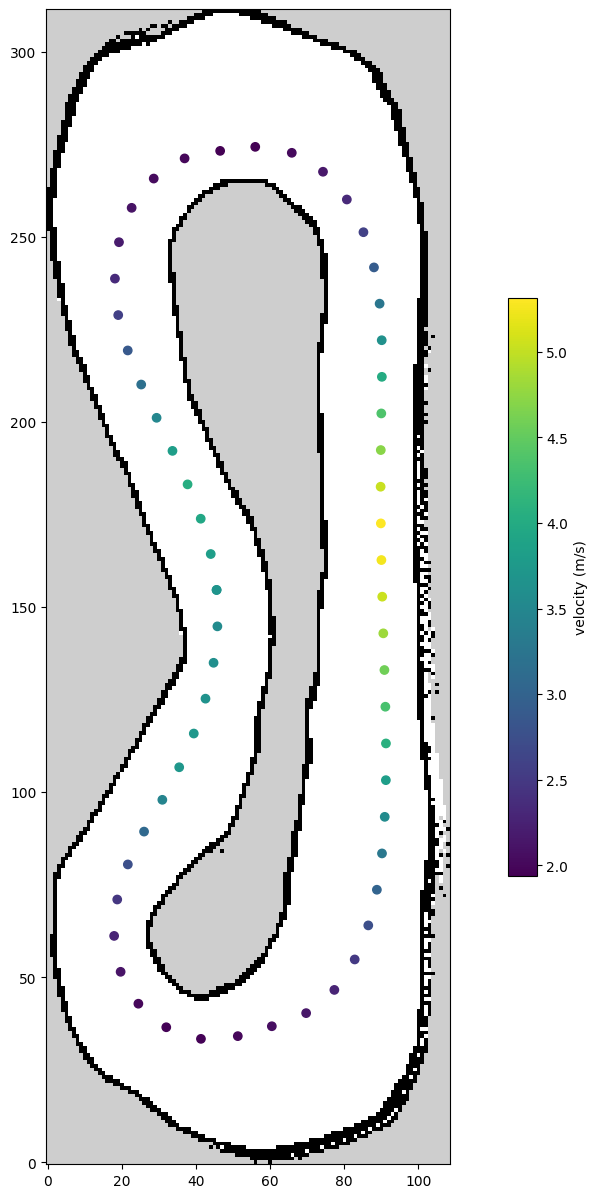

In [19]:
plt.figure(figsize=(15,15))
plt.imshow(orig_map_img, cmap='gray', origin='lower')
plt.scatter(transformed_data.iloc[:, 0], transformed_data.iloc[:, 1], c=transformed_data.iloc[:, 2])
cbar = plt.colorbar(shrink=0.5)
cbar.set_label('velocity (m/s)')

In [ ]:
new_waypoints_retransformed.to_csv(f"outputs/{MAP_NAME}_waypoints.csv", header=False, index=False)

In [21]:
# Generate a spline from the raw_data

from scipy.interpolate import splrep
from scipy.interpolate import splev


def split_data_to_segments(data):
    segments = []
    start = 0
    forward = True
    for i in range(1, len(data)):
        if forward and data[i, 0] < data[i-1, 0]:
            segments.append([data[start:i], forward])
            start = i
            forward = False
        elif not(forward) and data[i, 0] > data[i-1, 0]:
            segments.append([data[start:i], forward])
            start = i
            forward = True
    segments.append([data[start:], forward])
    return segments

def interpolate_segment(segment):
    x = segment[0][:, 0]
    y = segment[0][:, 1]
    v = segment[0][:, 2]
    if not segment[1]:
        x = np.flip(x)
        y = np.flip(y)
        v = np.flip(v)
    tck = splrep(x, y, s=0.1)
    xnew = np.linspace(x[0], x[-1], num=int(len(x) * 10), endpoint=True)
    ynew = splev(xnew, tck, der=0)

    # plot v
    tck_v = splrep(x, v, s=1)
    vnew = splev(xnew, tck_v, der=0)

    return xnew, ynew, vnew

# get segments
def get_segments(data):
    data_copy = data.copy()
    min_idx = data_copy.idxmin()[0]
    data_copy = data_copy[min_idx:].append(data_copy[:min_idx])

    segments = split_data_to_segments(data_copy.values)
    return segments

segments = get_segments(transformed_data)

new_waypoints = pd.DataFrame(columns=['x', 'y'])

splines = []
for segment in segments:
    xnew, ynew, vnew = interpolate_segment(segment)
    if(not(segment[1])):
        xnew = np.flip(xnew)
        ynew = np.flip(ynew)
        vnew = np.flip(vnew)
    new_waypoints = new_waypoints.append(pd.DataFrame({'x': xnew, 'y': ynew, 'v': vnew}))
    splines.append([xnew, ynew, vnew])

print(len(segments))

plt.figure(figsize=(15,15))
plt.imshow(orig_map_img, cmap='gray', origin='lower')
plt.scatter(new_waypoints.iloc[:, 0], new_waypoints.iloc[:, 1], color='red', marker='o')
plt.plot(transformed_data.iloc[:, 0], transformed_data.iloc[:, 1], color='blue', marker='x')
for spline in splines:
    plt.plot(spline[0], spline[1], color='red')


TypeError: m > k must hold

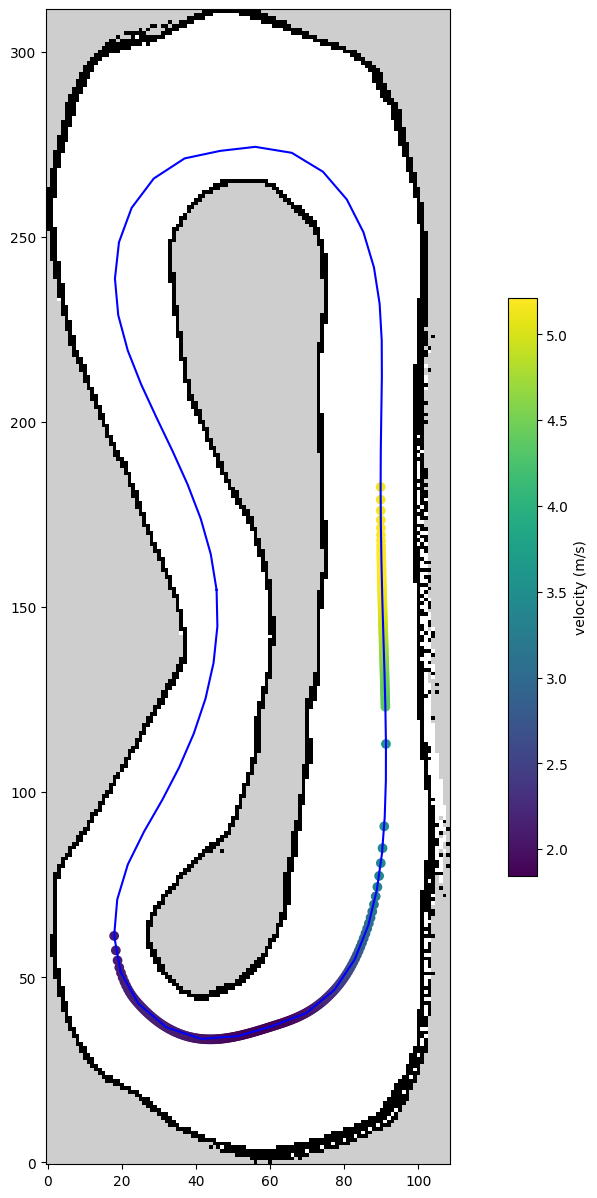

In [11]:
# plot v
plt.figure(figsize=(15,15))
plt.imshow(orig_map_img, cmap='gray', origin='lower')
plt.scatter(new_waypoints['x'], new_waypoints['y'], c=new_waypoints['v'])
cbar = plt.colorbar(shrink=0.5)
cbar.set_label('velocity (m/s)')
plt.plot(transformed_data.iloc[:, 0], transformed_data.iloc[:, 1], color='blue')


In [153]:
# retranform the waypoints to the original map
def retransform_waypoints(waypoints, map_resolution):
    waypoints_copy = waypoints.copy()
    waypoints_copy['x'] = waypoints_copy['x'] * map_resolution + orig_x
    waypoints_copy['y'] = waypoints_copy['y'] * map_resolution + orig_y
    return waypoints_copy

new_waypoints_retransformed = retransform_waypoints(new_waypoints, map_resolution)

new_waypoints_retransformed.to_csv(f"outputs/{MAP_NAME}_waypoints.csv", header=False, index=False)

## Visualize Velocity Profile in 3D

In [17]:
raw_data_np = transformed_data.to_numpy()

In [18]:
from mpl_toolkits.mplot3d import Axes3D
%matplotlib qt
# Visualize Velocity Profile
scale_x = 1.0
scale_y = 1.0
scale_z = 0.3  # scale z axis such that it does not appear stretched

# create 3d plot

fig = plt.figure(figsize=(15, 15))
ax = fig.gca(projection='3d')

# recast get_proj function to use scaling factors for the axes
ax.get_proj = lambda: np.dot(Axes3D.get_proj(ax), np.diag([scale_x, scale_y, scale_z, 1.0]))

ax.grid()
ax.set_aspect("auto")
ax.set_xlabel("east in m")
ax.set_ylabel("north in m")

# Doesn't work
# import matplotlib
# x,y = np.mgrid[0:orig_map_img.shape[0], 0:orig_map_img.shape[1]]
# ax.plot_surface(x,y,np.sin(0*x), facecolors=matplotlib.cm.ScalarMappable(cmap='gray').to_rgba(orig_map_img))

# plot velocity profile in 3D
ax.plot(raw_data_np[:, 0], raw_data_np[:, 1], raw_data_np[:, 2], color="k")
ax.set_zlabel("velocity in m/s")

# plot vertical lines visualizing acceleration and deceleration zones
ind_stepsize = 1
cur_ind = 0
no_points_traj_vdc = np.shape(raw_data_np)[0]
prev_vel = 0
curr_vel = 0

while cur_ind < no_points_traj_vdc - 1:
	curr_vel = raw_data_np[cur_ind, 2]
	x_tmp = [raw_data_np[cur_ind, 0], raw_data_np[cur_ind, 0]]
	y_tmp = [raw_data_np[cur_ind, 1], raw_data_np[cur_ind, 1]]
	z_tmp = [0.0, curr_vel]  # plot line with height depending on velocity

	# get proper color for line depending on acceleration
	if curr_vel - prev_vel > 0.0:
		col = "g"
	elif curr_vel - prev_vel < 0.0:
		col = "r"
	else:
		col = "gray"
	
	prev_vel = curr_vel

	# plot line
	ax.plot(x_tmp, y_tmp, z_tmp, color=col)

	# increment index
	cur_ind += ind_stepsize


plt.show()

ImportError: Failed to import any qt binding